In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

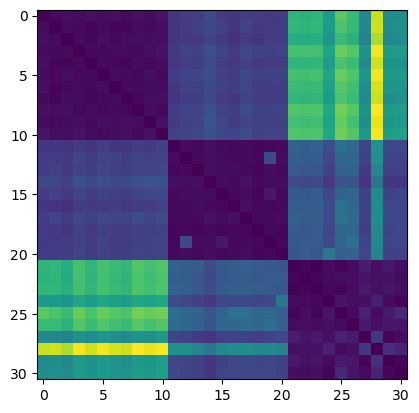

In [9]:
m_bodies = np.load("pairwise_distances_camel_horse_lion_sqd500.npy")
plt.imshow(m_bodies, interpolation="nearest", )

In [15]:
m_bodies.shape

(31, 31)

/Users/alonsoc1s/miniconda3/envs/tes_smalldata_hackathon/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


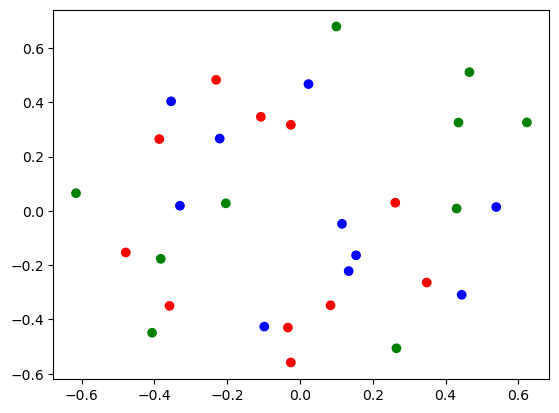

In [20]:
mds = manifold.MDS(
    n_components=2,
    max_iter=3000,
    eps=1e-9,
    dissimilarity="precomputed",
    n_jobs=1,
)
pos = mds.fit(m_bodies).embedding_
labels = np.concatenate([np.repeat("red", 11), np.repeat("blue", 10), np.repeat("green", 10)])
plt.scatter(pos[:, 0], pos[:, 1], c = labels)